In [1]:
import pandas as pd


In [2]:
data = pd.read_csv(r"C:\Users\Vagdevi\Downloads\marketing_AB.csv")

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [4]:
data.describe()

,Unnamed: 0,user id,total ads,most ads hour
count,588101.000000,5.881010e+05,588101.000000,588101.000000
mean,294050.000000,1.310692e+06,24.820876,14.469061
std,169770.279667,2.022260e+05,43.715181,4.834634
min,0.000000,9.000000e+05,1.000000,0.000000
25%,147025.000000,1.143190e+06,4.000000,11.000000
50%,294050.000000,1.313725e+06,13.000000,14.000000
75%,441075.000000,1.484088e+06,27.000000,18.000000
max,588100.000000,1.654483e+06,2065.000000,23.000000


In [7]:
# Drop the unnecessary column (Unnamed: 0) for clarity
ab_data_cleaned = data.drop(columns=['Unnamed: 0'])

In [13]:
# Display unique values in the 'test group' column to identify control and test groups
unique_groups = ab_data_cleaned['test group'].unique()
unique_groups

array(['ad', 'psa'], dtype=object)

In [14]:
# Check for missing values and general summary statistics
missing_values = ab_data_cleaned.isnull().sum()
summary_stats = ab_data_cleaned.describe(include='all')

missing_values,summary_stats

(user id          0
 test group       0
 converted        0
 total ads        0
 most ads day     0
 most ads hour    0
 dtype: int64,
              user id test group converted      total ads most ads day  \
 count   5.881010e+05     588101    588101  588101.000000       588101   
 unique           NaN          2         2            NaN            7   
 top              NaN         ad     False            NaN       Friday   
 freq             NaN     564577    573258            NaN        92608   
 mean    1.310692e+06        NaN       NaN      24.820876          NaN   
 std     2.022260e+05        NaN       NaN      43.715181          NaN   
 min     9.000000e+05        NaN       NaN       1.000000          NaN   
 25%     1.143190e+06        NaN       NaN       4.000000          NaN   
 50%     1.313725e+06        NaN       NaN      13.000000          NaN   
 75%     1.484088e+06        NaN       NaN      27.000000          NaN   
 max     1.654483e+06        NaN       NaN    2065.

In [15]:
# Segment the dataset into control (ad) and test (psa) groups

In [16]:
control_group = ab_data_cleaned[ab_data_cleaned['test group'] == 'ad']

test_group = ab_data_cleaned[ab_data_cleaned['test group'] == 'psa']

In [17]:
# Display the first few rows of each group to confirm segmentation

In [18]:
print("Control Group:")
print(control_group.head())

Control Group:
   user id test group  converted  total ads most ads day  most ads hour
0  1069124         ad      False        130       Monday             20
1  1119715         ad      False         93      Tuesday             22
2  1144181         ad      False         21      Tuesday             18
3  1435133         ad      False        355      Tuesday             10
4  1015700         ad      False        276       Friday             14


In [19]:
print("\nTest Group:")
print(test_group.head())


Test Group:
     user id test group  converted  total ads most ads day  most ads hour
18    900681        psa      False        248     Saturday             19
38    905704        psa      False         27     Thursday              8
68    904595        psa      False         13      Tuesday             19
140   901904        psa      False         32    Wednesday             19
157   902234        psa      False        105      Tuesday             19


In [20]:
# Check for missing values in each column
missing_values = ab_data_cleaned.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64


In [21]:
# Count the number of users in each group
#checking for data imbalance: Imbalance occurs when the number of users in the control and test groups differs significantly.



In [22]:
group_counts = ab_data_cleaned['test group'].value_counts()
print("Group Counts:\n", group_counts)

Group Counts:
 ad     564577
psa     23524
Name: test group, dtype: int64


In [23]:
# Calculate the proportion of users in each group
group_proportions = ab_data_cleaned['test group'].value_counts(normalize=True) * 100
print("\nGroup Proportions (%):\n", group_proportions)


Group Proportions (%):
 ad     96.000007
psa     3.999993
Name: test group, dtype: float64


In [24]:
# Calculate conversion rates for control and test groups

In [25]:
control_conversion_rate = control_group['converted'].mean()*100
test_conversion_rate = test_group['converted'].mean()*100

In [26]:
print(f"Control Group Conversion Rate: {control_conversion_rate:.2f}%")
print(f"Test Group Conversion Rate: {test_conversion_rate:.2f}%")

Control Group Conversion Rate: 2.55%
Test Group Conversion Rate: 1.79%


In [27]:
#Comparing Conversion Rates

In [28]:
import matplotlib.pyplot as plt

In [29]:
groups = ['Control''Test']
cinversion_rates = [control_conversion_rate,test_conversion_rate]

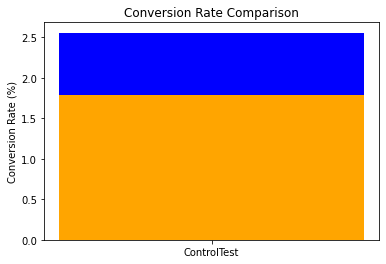

In [31]:
plt.bar(groups, cinversion_rates, color=['blue', 'orange'])
plt.title('Conversion Rate Comparison')
plt.ylabel('Conversion Rate (%)')
plt.show()

In [32]:
# Z-test
# Statistical Analysis

In [33]:
from statsmodels.stats.proportion import proportions_ztest

In [34]:
# Number of conversions and total users in each group
successes = [control_group['converted'].sum(), test_group['converted'].sum()]
nobs = [len(control_group), len(test_group)]

In [35]:
successes
nobs

[564577, 23524]

In [36]:
z_stat, p_value = proportions_ztest(successes, nobs)
print(f"Z-Statistic: {z_stat}, P-value: {p_value}")

Z-Statistic: 7.3700781265454145, P-value: 1.7052807161559727e-13


In [37]:
# Interpretation
if p_value < 0.05:
    print("The difference in conversion rates is statistically significant.")
else:
    print("The difference in conversion rates is not statistically significant.")

The difference in conversion rates is statistically significant.


In [ ]:
# Hence we can conclude that the test group change is effective.